## COMPONENT TWO (Emergency Vehicle Identification) (30 points)

- The essence of emergency vehicle identification is to quickly and accurately detect emergency 
vehicles (e.g., ambulances, police cars, fire trucks) to allow for immediate clearance on roads 
and prioritized response. In this exercise, you will develop a Convolutional Neural Network 
(CNN) model to classify emergence and non-emergence vehicles. You will train this model 
using the Emergency vehicle dataset from Kaggle.

- Dataset: https://www.kaggle.com/datasets/abhisheksinghblr/emergency-vehicles-identification?resource=download

- Goal
- Your goal for this exercise is to develop a CNN model that will classify the images in the dataset 
as emergence and non-emergence vehicles.

## CONVOLUTIONAL NEURAL NETWORK

## In this section, I will import the necessary python libraries

In [2]:
# import python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2 # open-cv is used for image processing
from tensorflow import keras
from keras.models import Sequential # used for building CNN model
from keras.layers import Activation, Dropout, Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization # used for building CNN layers
# import ImageDataGenerator from Keras library
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import Stochastic Gradient Optimizer
from keras.optimizers import SGD
#import adam 
from keras.optimizers import Adam
from tensorflow.keras.layers import AveragePooling2D
# import batch normalization
from tensorflow.keras.layers import BatchNormalization
#import confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix # importing confusion matrix
from sklearn.metrics import classification_report # importing classification report


## Data Preprocessing and Data Augmentation

- Reading in Image directories for both training and test data
- Check for Null values
- Examining the Pandas Dataframe
- Checking the shape of the dataframe

In [3]:
# Load the datasets
train_df = pd.read_csv(r"C:\Users\865515\OneDrive - hull.ac.uk\Emergency_Vehicles\train.csv")

# Path to the train and test directories
train_dir = r'C:\Users\865515\OneDrive - hull.ac.uk\Emergency_Vehicles\train'

In [4]:
print(train_df.head)

<bound method NDFrame.head of      image_names  emergency_or_not
0       1503.jpg                 0
1       1420.jpg                 0
2       1764.jpg                 0
3       1356.jpg                 0
4       1117.jpg                 0
...          ...               ...
1641    1638.jpg                 0
1642    1095.jpg                 0
1643    1130.jpg                 0
1644    1294.jpg                 0
1645     860.jpg                 1

[1646 rows x 2 columns]>


In [5]:
# check for null values
print(train_df.isnull().sum())

image_names         0
emergency_or_not    0
dtype: int64


In [6]:
# check for duplicates 
train_df.duplicated().sum()

0

In [7]:
#Changing data type to strings
train_df['emergency_or_not'] = train_df['emergency_or_not'].astype(int)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 19.4+ KB


## Splitting the Training_df into training and validation sets


In [8]:
# importing os library
# importing Image from PIL 
import os
from PIL import Image

# Function to load images and labels (emergency_or_not)
def load_images(image_names, labels, train_dir):
    """
    Loads images from the specified directory and associates them with their labels.
    
    Parameters:
    - image_names: List of image filenames (from the CSV file).
    - labels: List of corresponding labels (e.g., 'emergency_or_not').
    - train_dir: Path to the directory where images are stored.
    
    Returns:
    - x_data: A numpy array of loaded images.
    - y_data: A numpy array of labels.
    """
    x_data = []  # List to store image data
    y_data = []  # List to store labels
    
    for image_name, label in zip(image_names, labels):
        image_path = os.path.join(train_dir, image_name)
        
        try:
            # Check if the image file exists
            if os.path.exists(image_path):
                # Open the image and append to the x_data list
                img = Image.open(image_path)
                img = img.resize((224, 224))  # Resize to a standard size
                img_array = np.array(img)  # Convert image to numpy array
                x_data.append(img_array)
                y_data.append(label)
            else:
                print(f"Warning: {image_name} not found at {image_path}")
        except Exception as e:
            print(f"Error loading {image_name}: {e}")
    
    # Convert lists to numpy arrays
    x_data = np.array(x_data)
    y_data = np.array(y_data)
    
    return x_data, y_data




# Load the image data and labels
x_train, y_train = load_images(train_df['image_names'], train_df['emergency_or_not'], train_dir)

# Check the shape of the loaded data
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")


x_train shape: (1646, 224, 224, 3)
y_train shape: (1646,)


In [9]:
# split the data into training sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

# print the percentage of the data points according to the 80% & 20% split.
print("There are %d data points in the training set." %
(len(x_train), ))
print("There are %d data points in the testing set." %
(len(x_test), ))

There are 1316 data points in the training set.
There are 330 data points in the testing set.


In [10]:
# print the shape of the images 
# examining the size of the arrays in each dimension.
# pixel of images
print("The x_train shape is:", x_train.shape)
print("The x_test shape is:", x_test.shape)
print("The y_train shape is:", y_train.shape)
print("The y_test shape is:", y_test.shape)

The x_train shape is: (1316, 224, 224, 3)
The x_test shape is: (330, 224, 224, 3)
The y_train shape is: (1316,)
The y_test shape is: (330,)


## Viewing the Images

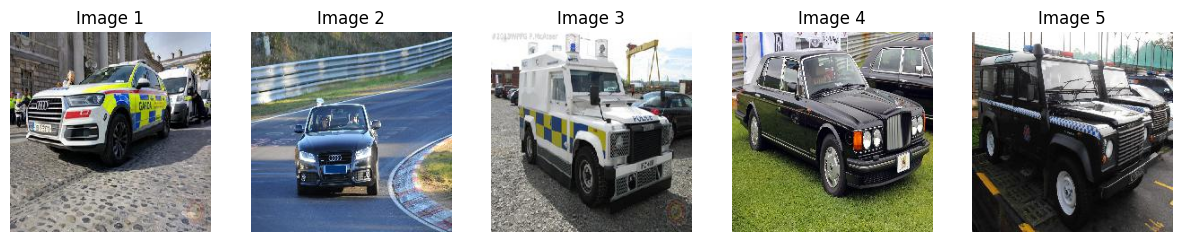

In [11]:
# Plot the first 5 images in x_train
def plot_first_five_images(x_train):
    
    # Ensuring that there are at least 5 images in x_train
    num_images = min(5, len(x_train))
     
    # Setting up the plot
    plt.figure(figsize=(15, 5))
    
    # Looping through the first 5 images and plot them
    for i in range(num_images):
        plt.subplot(1, 5, i + 1)  # Create a 1x5 grid
        plt.imshow(x_train[i])  # Display the image
        plt.axis('off')  # Turn off axis
        plt.title(f'Image {i+1}')  # Title for each image

    plt.show()

# Plot the first 5 images
plot_first_five_images(x_train)

In [12]:
## Data Preprocessing
#MinMax Normalisation
# divide by 255. pixel is between range of 0 and 255
x_train = x_train / 255.0
x_test = x_test / 255.0

# print x_train re scaled
print(x_train)

[[[[0.26666667 0.29411765 0.2627451 ]
   [0.35686275 0.38431373 0.35294118]
   [0.2745098  0.29411765 0.27058824]
   ...
   [0.67843137 0.74117647 0.84313725]
   [0.6745098  0.74117647 0.85098039]
   [0.6745098  0.74117647 0.85098039]]

  [[0.35686275 0.38431373 0.35294118]
   [0.3372549  0.36470588 0.33333333]
   [0.22352941 0.24313725 0.21960784]
   ...
   [0.68627451 0.74901961 0.85098039]
   [0.67843137 0.74509804 0.85490196]
   [0.67843137 0.74509804 0.85490196]]

  [[0.38039216 0.4        0.37647059]
   [0.42745098 0.44705882 0.42352941]
   [0.36078431 0.36862745 0.34901961]
   ...
   [0.69411765 0.75686275 0.85882353]
   [0.69019608 0.75686275 0.85882353]
   [0.68627451 0.75294118 0.85490196]]

  ...

  [[0.58823529 0.55294118 0.55686275]
   [0.60784314 0.58431373 0.58431373]
   [0.64313725 0.60784314 0.61176471]
   ...
   [0.64313725 0.62352941 0.60784314]
   [0.62352941 0.59215686 0.58039216]
   [0.60784314 0.57647059 0.56470588]]

  [[0.66666667 0.62745098 0.62352941]
   [0.6

## Image Transformation and Data Augmentation

In [13]:
# using ImageDataGenerator to rotate images by 20 degrees,
#shift images horizontally up to 20% of the width,
# shift images verically up to 25% of height
# randomly flip images vertically
# do not randomly flip images vertically, set to false
# crop part of the image by 20%
# zoom the image by 20%

train_datagen = ImageDataGenerator(
    rotation_range=20,         # Rotate images by a random degree
    width_shift_range=0.2,     # Shift images horizontally
    height_shift_range=0.2,    # Shift images vertically
    shear_range=0.2,           # Apply shearing transformations
    zoom_range=0.2,            # Random zoom
    horizontal_flip=True,      # Randomly flip images horizontally
)

In [14]:
# fitting image transformation into normalised images from training data
train_datagen.fit(x_train)

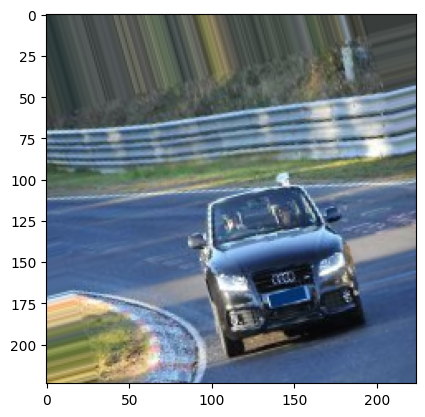

In [15]:
# plotting a randomly transformed image using random_transform()
plt.imshow(train_datagen.random_transform(x_train[1]))

## Building the Convolutional Neural Network

 ## Model One 
 
###  Constructor Stage

- In this stage, I will use the Sequential () model from the Keras library to build a CNN 
- I will build 3 Convolution Blocks, with 32, 64, and 128 layers with ReLU and Pooling
- A Kernel size of (3,3) for both vertical and horizontal. 
- I will add a flatten layer
- I will add a dropout of 50% for regularization, to prevent overfitting.
- I will use one neuron in the output layer
- I will use the Sigmoid Activation function in the outer layer


In [27]:
# using sequential to build my convolution blocks, pooling, flatten, and fully connected layers. 
model = Sequential([
    # first Convolutional layer
    Conv2D(filters=32, kernel_size = (3, 3), input_shape=(224, 224, 3), activation='relu'),  
    MaxPooling2D((2, 2)), # Maxpooling

     # second Convolutional layer
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)), #Maxpooling

      # third Convolutional layer
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)), #MaxPooling

    # Flattening the output of the last pooling layer
    Flatten(),

    # Fully connected layers
    Dense(64, activation='relu'), # this is the hidden layer
    Dropout(0.5),  # Dropout Regularization to prevent overfitting
    
    Dense(1, activation='sigmoid')  # this is the outer layer with sigmoid activation function
])

# a summary of my model
model.summary()


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,631,169 (21.48 MB)

 Trainable params: 5,631,169 (21.48 MB)

 Non-trainable params: 0 (0.00 B)

## Compilation Stage
Before training, I will configure the model with an optimizer, a loss function, and evaluation metrics:
- In this stage, I will configure the model using Adam Optimizer
- A loss function of Binary Cross Entropy since my classifaction is binary, either 0 or 1. 
- My evaluation metric will be accuracy

In [28]:
# compile the model
def compile_model(model, optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']):
    """
    Compiles a given Keras model with the specified optimizer, loss function, and metrics.
    
    Parameters:
    - model: Keras model to be compiled.
    - optimizer: Optimizer to be used. In this binary classification 'adam' is used.
    - loss: Loss function to be used. Since it's a binary classification problem 'binary_crossentropy' is used.
    - metrics: List of metrics to evaluate the model. ['accuracy'] is used.
    
    Returns:
    - Compiled model.
    """
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    print(f"Model compiled with optimizer={optimizer}, loss={loss}, metrics={metrics}")
    return model


# compile the model with the compile_model function
compile_model(model)

Model compiled with optimizer=adam, loss=binary_crossentropy, metrics=['accuracy']


<Sequential name=sequential_1, built=True>

## Training Stage
- In this stage, I will train the model
- I will train the model with a number of epochs of 20

In [29]:
# train my model for epoch to 20. 
#finding a set of weights in the network with minimal loss

history = model.fit(
    train_datagen.flow(x_train, y_train),  # Using the flow method
    epochs=20,
    validation_data=(x_test, y_test)  # Validation data
)



Epoch 1/20


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 243ms/step - accuracy: 0.5753 - loss: 0.7915 - val_accuracy: 0.6606 - val_loss: 0.6242
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - accuracy: 0.6833 - loss: 0.6340 - val_accuracy: 0.6788 - val_loss: 0.6111
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 240ms/step - accuracy: 0.6869 - loss: 0.6141 - val_accuracy: 0.6939 - val_loss: 0.6442
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 245ms/step - accuracy: 0.7263 - loss: 0.5758 - val_accuracy: 0.7182 - val_loss: 0.5669
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 256ms/step - accuracy: 0.7290 - loss: 0.5730 - val_accuracy: 0.7182 - val_loss: 0.5653
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 244ms/step - accuracy: 0.6951 - loss: 0.5935 - val_accuracy: 0.7273 - val_loss: 0.5408
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 245ms/step - accuracy: 0.7267 - loss: 0.5821 - val_accuracy: 0.7606 - val_loss: 0.5158
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 243ms/step - accuracy: 0.7370 - loss: 0.5331 - val_accuracy: 0.748

In [31]:
#fit the model and convert to a pandas dataframe
history_df = pd.DataFrame(history.history) # convert history to pandas dataframe

# print my accuracy, and loss
print(history_df)

    accuracy      loss  val_accuracy  val_loss
0   0.606383  0.706173      0.660606  0.624153
1   0.674012  0.635163      0.678788  0.611106
2   0.697568  0.602606      0.693939  0.644247
3   0.723404  0.573800      0.718182  0.566855
4   0.715805  0.597053      0.718182  0.565268
5   0.728723  0.564810      0.727273  0.540818
6   0.731763  0.576713      0.760606  0.515809
7   0.733283  0.552424      0.748485  0.511440
8   0.727204  0.555782      0.760606  0.484674
9   0.747720  0.547074      0.745455  0.541476
10  0.750000  0.526128      0.769697  0.470512
11  0.766717  0.518732      0.781818  0.475458
12  0.762918  0.487065      0.757576  0.605075
13  0.768997  0.520742      0.809091  0.482920
14  0.775836  0.473514      0.775758  0.427042
15  0.789514  0.444449      0.796970  0.464018
16  0.801672  0.421549      0.806061  0.467682
17  0.816109  0.407635      0.821212  0.382199
18  0.829027  0.394397      0.824242  0.452232
19  0.824468  0.401086      0.842424  0.385648


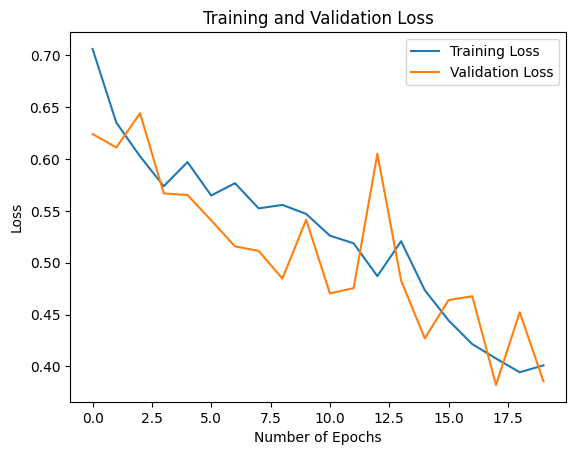

In [35]:
# Plotting Visualization for Overfitting 

# plot the training loss versus the validation loss
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('./Training and Validation Loss Model 0')
plt.show()


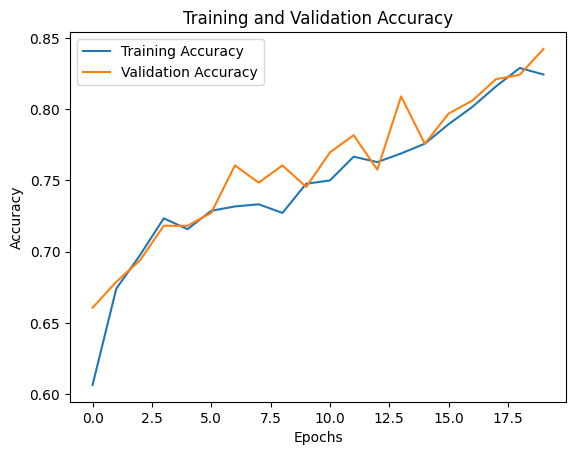

In [36]:
# plotting training and validation accuracy
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('./Training and Validation Accuracy Model 0')
plt.show()

## Evaluation Stage
- Predict binary labels for images in the test dataset and compare the predicted probability to 0.5
- If the probability is greater than 0.5, the prediction will be True (class 1); otherwise, it will be False (class 0). 
- Generate a classification report
- Display the confusion matrix

In [37]:
# predicting the binary labels for the images in the testing set
y_pred = (model.predict(x_test) > 0.5).astype(int) # compare the predicted probability to 0.5 - threshold

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       198
           1       0.97      0.63      0.76       132

    accuracy                           0.84       330
   macro avg       0.88      0.81      0.82       330
weighted avg       0.87      0.84      0.83       330



<Figure size 2000x3000 with 0 Axes>

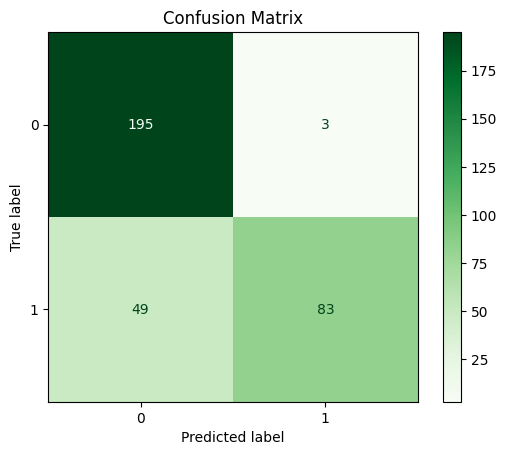

In [39]:
# defining a function for classification report and confusion matrix 

def evaluate_model(y_test, y_pred):
    """
    This function computes the classification report and plots the confusion matrix.

    Parameters:
    y_test (array-like): True labels
    y_pred (array-like): Predicted Labels
    """
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Plot
    plt.figure(dpi=200, figsize=(10, 15))
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, cmap='Greens', normalize=None
    )
    plt.title('Confusion Matrix')
    plt.savefig('./Classification Report and Confusion Matrix Model 0')
    plt.show()

evaluate_model( y_test, y_pred)

## Build a Second Convolutional Neural Network with Hyperparameter Tuning


## Model Two

### Constructor Stage
- In this stage, I will build 3 Convolution Blocks, with 32, 64, and 128 layers with ReLU and Pooling
- my kernel size will be (5, 5) for both horizontal and vertical
- My input shape will be (224,224,3). Due to the shape and image color - RGB (Red,Blue,Green) - 3.
- I will add a flatten layer
- I will use two dense layers
- I will use one neuron in the output layer
- I will use the Sigmoid Activation function in the outer layer
- I will use Maxpooling

In [40]:
def create_cnn_model(input_shape=(224, 224, 3), dropout_rate=0.5):
    """
    Function to build a CNN model with 3 convolutional blocks, followed by fully connected layers.
    
    Parameters:
    - input_shape: The shape of the input images (default is (224, 224, 3) for color images)
    - dropout_rate: The dropout rate for the fully connected layer (default is 0.5)
    
    Returns:
    - model: A compiled CNN model
    """
    model = Sequential([
        # First convolutional block
        Conv2D(filters=32, kernel_size=(5, 5), input_shape=input_shape, activation='relu'),
        MaxPooling2D((2, 2)),  # MaxPooling

        # Second convolutional block
        Conv2D(filters=64, kernel_size=(5, 5), activation='relu'),
        MaxPooling2D((2, 2)),  # MaxPooling

        # Third convolutional block
        Conv2D(filters=128, kernel_size=(5, 5), activation='relu'),
        MaxPooling2D((2, 2)),  # MaxPooling

        # Flatten the output of the last pooling layer
        Flatten(),

        # Fully connected layer (hidden layer)
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),  # Dropout Regularization to prevent overfitting
        
        # Output layer
        Dense(1, activation='sigmoid')  # Binary classification output layer
    ])
    return model

# instantiate model 
model_2 = create_cnn_model()
# Print the summary of the model
model_2.summary()
    

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 106, 106, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 49, 49, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       4,718,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,981,505 (19.00 MB)

 Trainable params: 4,981,505 (19.00 MB)

 Non-trainable params: 0 (0.00 B)

## Compilation Stage
- Compile the model with Adam optimizer, Loss Function of 'binary cross entropy', and metrics of 'accurary'

In [41]:
# compile the model
def compile_model(model, optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']):
    """
    Compiles a given Keras model with the specified optimizer, loss function, and metrics.
    
    Parameters:
    - model: Keras model to be compiled.
    - optimizer: Optimizer to be used. In this binary classification 'adam' is used.
    - loss: Loss function to be used. Since it's a binary classification problem 'binary_crossentropy' is used.
    - metrics: List of metrics to evaluate the model. ['accuracy'] is used.
    
    Returns:
    - Compiled model.
    """
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    print(f"Model compiled with optimizer={optimizer}, loss={loss}, metrics={metrics}")
    return model


# compile the model with the compile_model function
compile_model(model_2)

Model compiled with optimizer=adam, loss=binary_crossentropy, metrics=['accuracy']


<Sequential name=sequential_2, built=True>

## Training Stage
- Train the model for 20 epochs
- Use a batch size of 64

In [42]:
# train my model for epoch to 20. 
#finding a set of weights in the network with minimal loss

history1 = model_2.fit(
    train_datagen.flow(x_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(x_test, y_test)
)

Epoch 1/20


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 586ms/step - accuracy: 0.5545 - loss: 1.1061 - val_accuracy: 0.6000 - val_loss: 0.6736
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 576ms/step - accuracy: 0.5822 - loss: 0.6850 - val_accuracy: 0.6000 - val_loss: 0.6905
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 628ms/step - accuracy: 0.5866 - loss: 0.6911 - val_accuracy: 0.6000 - val_loss: 0.6676
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 667ms/step - accuracy: 0.5774 - loss: 0.6759 - val_accuracy: 0.6000 - val_loss: 0.6482
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 677ms/step - accuracy: 0.5951 - loss: 0.6607 - val_accuracy: 0.6576 - val_loss: 0.6264
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 679ms/step - accuracy: 0.6118 - loss: 0.6584 - val_accuracy: 0.6576 - val_loss: 0.6474
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 673ms/step - accuracy: 0.6703 - loss: 0.6369 - val_accuracy: 0.7091 - val_loss: 0.5932
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 668ms/step - accuracy: 0.6717 - loss: 0.6111 - val_accuracy: 0.724

In [43]:
history_df1 = pd.DataFrame(history1.history) # convert history to pandas dataframe

# examine accuracy, loss, val_accuracy, val_loss
history_df1

,accuracy,loss,val_accuracy,val_loss
0,0.565350,0.852231,0.600000,0.673594
1,0.588146,0.688799,0.600000,0.690547
2,0.582827,0.691135,0.600000,0.667623
3,0.582827,0.671899,0.600000,0.648226
4,0.588906,0.664784,0.657576,0.626397
5,0.630699,0.663659,0.657576,0.647434
6,0.675532,0.633398,0.709091,0.593195
7,0.699088,0.596123,0.724242,0.588836
8,0.727204,0.571740,0.766667,0.526013
9,0.717325,0.570276,0.736364,0.560272


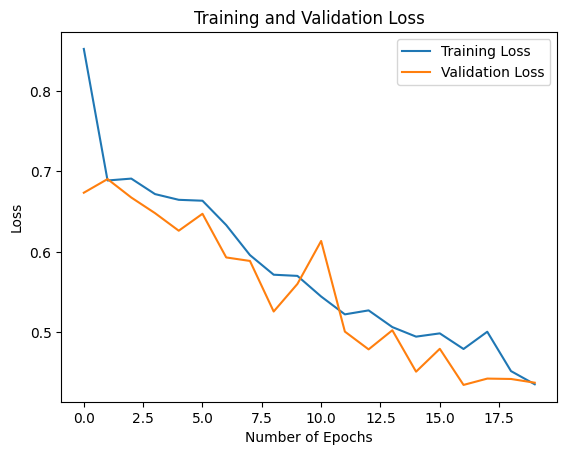

In [45]:
# Plotting Visualization for Overfitting 

# plot the training loss versus the validation loss
plt.plot(history_df1['loss'], label='Training Loss')
plt.plot(history_df1['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('./Training and Validation Loss Model 1')
plt.show()

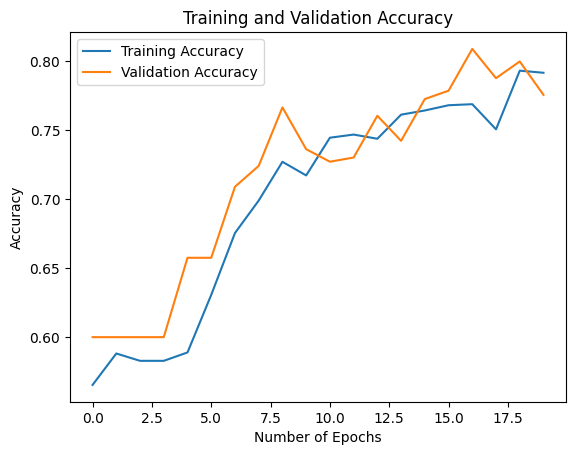

In [46]:
# plotting training and validation accuracy
plt.plot(history_df1['accuracy'], label='Training Accuracy')
plt.plot(history_df1['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('./Training and Validation Accuracy Model 1')
plt.show()

## Evaluation Stage
- Predict binary labels for images in the test dataset. compare the predicted probability to 0.5
- If the probability is greater than 0.5, the prediction will be True (class 1); otherwise, it will be False (class 0).
- Generate a classification report
- Display the confusion matrix

In [49]:
# predicting the binary labels for the images in the testing set
y_pred2 = (model_2.predict(x_test) > 0.5).astype(int) # compare the predicted probability to 0.5
# If the probability is greater than 0.5, the prediction will be True (class 1); otherwise, it will be False (class 0)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       198
           1       0.97      0.63      0.76       132

    accuracy                           0.84       330
   macro avg       0.88      0.81      0.82       330
weighted avg       0.87      0.84      0.83       330



<Figure size 2000x3000 with 0 Axes>

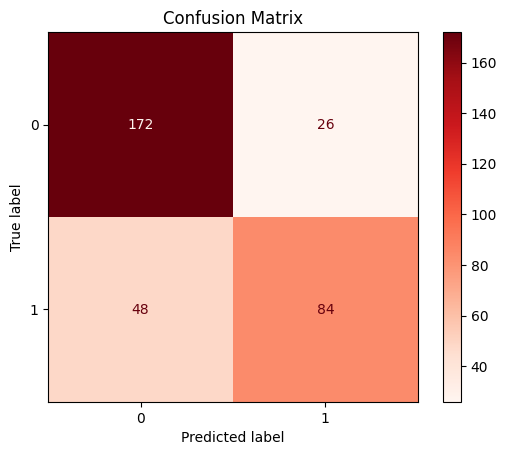

In [50]:
# evaluating model
# defining a function for classification report and confusion matrix 

def evaluate_model(y_test, y_pred2):
    """
    This function computes the classification report and plots the confusion matrix.

    Parameters:
    y_test (array-like): True labels
    y_pred (array-like): Predicted Labels
    """
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Plot
    plt.figure(dpi=200, figsize=(10, 15))
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred2, cmap='Reds', normalize=None
    )
    plt.title('Confusion Matrix')
    plt.show()

evaluate_model( y_test, y_pred2)


## Build A Third CNN Model and tune the hyperparameters, and Regularization

## Model Three

## Constructor Stage
- In this stage, I will build 3 Convolution Blocks, with 32, 64, and 128 layers with ReLU and Pooling
- I will add a dropout of 50% for regularization, to prevent overfitting.
- I will add batch normalization with momentum is 0.9 or 90%
- I will add a kernel size of (2,2)
- I will add padding of same
- I will use a stride length of 2
- I will use Maxpooling
- I will add a flatten layer
- Two Dense outer layer
- I will use the Sigmoid Activation function in the outer layer

In [51]:
# using sequential to build my convolution blocks and pooling, flatten, and fully connected layers. 
model_3 = Sequential([
    
    # First Convolutional Layer
    Conv2D(filters=32, kernel_size=(2, 2), padding='same', activation='relu', input_shape=(224, 224, 3)),
    # First MaxPooling Layer
    MaxPooling2D(pool_size=(2, 2),padding='same'),
    BatchNormalization(momentum=0.9), # batch normalization 
    
    # Second Convolutional Layer
    Conv2D(filters=64, kernel_size=(2, 2),  padding='same', activation='relu'),
    # Second MaxPooling Layer
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    BatchNormalization(momentum=0.9),
    
    # Third Convolutional Layer
    Conv2D(filters=128, kernel_size=(2, 2), padding='same', activation='relu'),
    # Third MaxPooling Layer
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    BatchNormalization(momentum=0.9),
    
    # Flatten the output and pass it to the Dense layers
    Flatten(),
    
    # Fully connected layers
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),# this is the hidden layer
    Dropout(0.5),  # Regularization to prevent overfitting
    
    Dense(1, activation='sigmoid')  # this is the outer layer with sigmoid activation function for binary classification
])

# Summary of the model
model_3.summary()



C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 112, 112, 64)        │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 56, 56, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │       6,422,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,469,281 (24.68 MB)

 Trainable params: 6,468,833 (24.68 MB)

 Non-trainable params: 448 (1.75 KB)

### Compilation Stage
- Before training, I configure the model with an Adam optimizer, a loss function, and evaluation metrics:

- In this stage, I will configure the model using Adam Optimizer with a learning rate of 10 percent or 0.01. 
- A loss function of Binary Cross Entropy since my classifaction is binary, either 0 or 1.
- My evaluation metric will be accuracy


In [52]:
from tensorflow.keras.optimizers import Adam

def compile_with_adam(model, learning_rate=0.01, loss='binary_crossentropy', metrics=['accuracy']):
    """
    Creates an Adam optimizer with a specified learning rate, compiles the model, 
    and sets the loss function and metrics.
    
    Parameters:
    - model: Keras model to be compiled.
    - learning_rate: Learning rate for the Adam optimizer. 0.01
    - loss: Loss function to be used. Default is 'binary_crossentropy'.
    - metrics: List of metrics to evaluate the model. Default is ['accuracy'].
    
    Returns:
    - Compiled model.
    """
    # Create Adam optimizer
    adam_optimizer = Adam(learning_rate=learning_rate)
    
    # Compile the model
    model.compile(optimizer=adam_optimizer, loss=loss, metrics=metrics)
    print(f"Model compiled with Adam optimizer (learning rate={learning_rate}), loss={loss}, metrics={metrics}")
    
    return model


# compile the model with the compile_model function
compile_model(model_3)

Model compiled with optimizer=adam, loss=binary_crossentropy, metrics=['accuracy']


<Sequential name=sequential_3, built=True>

## Training Stage
- In this stage, I will train the model
- I will set the number of epochs to 20

In [53]:
# train my model for epoch to 20. 
#finding a set of weights in the network with minimal loss

history3 = model_3.fit(
    train_datagen.flow(x_train, y_train,),
    epochs=20,
    validation_data=(x_test, y_test)
)

Epoch 1/20


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 274ms/step - accuracy: 0.5808 - loss: 2.5333 - val_accuracy: 0.6333 - val_loss: 0.9865
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 263ms/step - accuracy: 0.6038 - loss: 1.2140 - val_accuracy: 0.6667 - val_loss: 0.6835
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 258ms/step - accuracy: 0.5755 - loss: 0.8419 - val_accuracy: 0.6091 - val_loss: 0.6462
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 262ms/step - accuracy: 0.5653 - loss: 0.6866 - val_accuracy: 0.6061 - val_loss: 0.6496
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 260ms/step - accuracy: 0.5744 - loss: 0.7014 - val_accuracy: 0.6030 - val_loss: 0.6264
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 264ms/step - accuracy: 0.5755 - loss: 0.6739 - val_accuracy: 0.6273 - val_loss: 0.6136
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 271ms/step - accuracy: 0.6057 - loss: 0.6645 - val_accuracy: 0.6212 - val_loss: 0.6080
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 264ms/step - accuracy: 0.5757 - loss: 0.6572 - val_accuracy: 0.615

In [55]:
history_df3 = pd.DataFrame(history3.history) # convert history to pandas dataframe
history_df3

,accuracy,loss,val_accuracy,val_loss
0,0.584347,2.168814,0.633333,0.986452
1,0.594225,1.103972,0.666667,0.683477
2,0.572948,0.791698,0.609091,0.646213
3,0.555471,0.681793,0.606061,0.649646
4,0.571429,0.700462,0.603030,0.626422
5,0.569909,0.673978,0.627273,0.613559
6,0.604863,0.654904,0.621212,0.607957
7,0.578267,0.651596,0.615152,0.610574
8,0.591185,0.675666,0.603030,0.636208
9,0.587386,0.665561,0.606061,0.604165


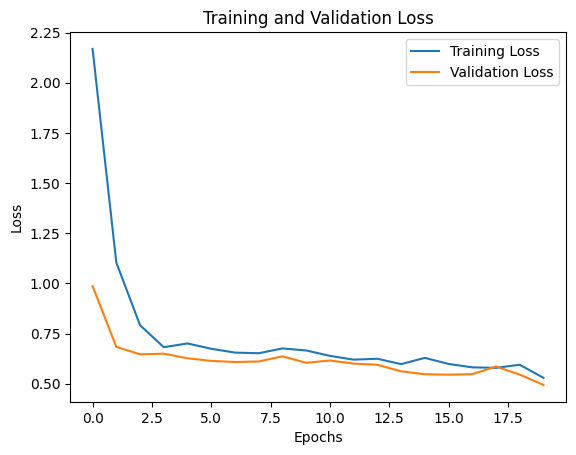

In [56]:
# plot the training loss versus the validation loss
plt.plot(history_df3['loss'], label='Training Loss')
plt.plot(history_df3['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('./Training and Validation loss Model 3')
plt.show()

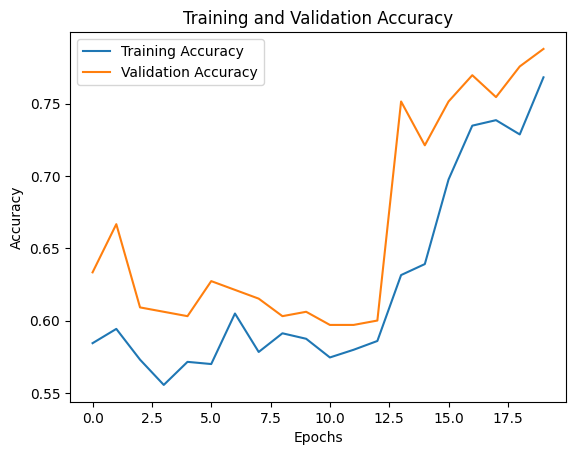

In [57]:
# plotting training and validation accuracy
plt.plot(history_df3['accuracy'], label='Training Accuracy')
plt.plot(history_df3['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('./Training and Validation Accuracy Model 3')
plt.show()

## Evaluation Stage
- Predict binary labels for images in the test dataset. compare the predicted probability to 0.5
- If the probability is greater than 0.5, the prediction will be True (class 1); otherwise, it will be False (class 0)
- Generate a classification report
- Display the confusion matrix

In [60]:
# predicting the binary labels for the images in the testing set
y_pred3 = (model_3.predict(x_test) > 0.5).astype(int) # compare the predicted probability to 0.5
# If the probability is greater than 0.5, the prediction will be True (class 1); otherwise, it will be False (class 0)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       198
           1       0.75      0.70      0.72       132

    accuracy                           0.79       330
   macro avg       0.78      0.77      0.78       330
weighted avg       0.79      0.79      0.79       330



<Figure size 2000x3000 with 0 Axes>

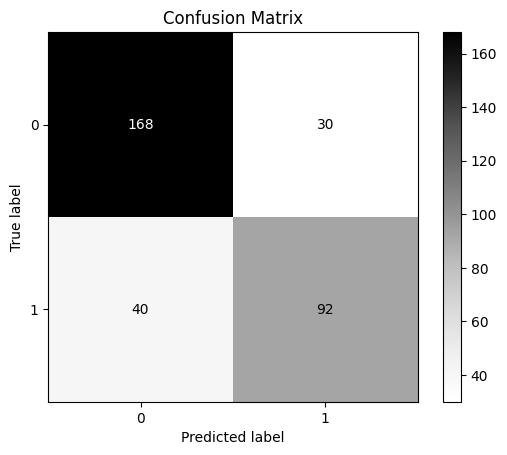

In [62]:
# evaluating model
# defining a function for classification report and confusion matrix 

def evaluate_model(y_test, y_pred3):
    """
    This function computes the classification report and plots the confusion matrix.

    Parameters:
    y_test (array-like): True labels
    y_pred (array-like): Predicted Labels
    """
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred2))

    # Confusion Matrix Plot
    plt.figure(dpi=200, figsize=(10, 15))
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred3, cmap='Greys', normalize=None
    )
    plt.title('Confusion Matrix')
    plt.show()

evaluate_model( y_test, y_pred3)


## Building a Fourth Convolutional Neural Network

## Model Four

## Constructor Stage
- In this stage, I will build 3 Convolution Blocks, with 32, 64, and 64 layers with ReLU and Pooling
- I will add a kernel size of (2,2)
- I will add padding of same
- I will use a stride length of 2
- I will use the same Maxpooling
- I will add Batch Normalization after every Convolution block
- I will add a flatten layer
- One Dense Layers
- I will add a dropout of 10% for regularization, to prevent overfitting.
- I will use one neuron in the output layer
- I will use the Softmax Activation function in the outer layer


In [17]:
# Instantiante Model Swquential
model_4 = Sequential()

# First 2D Convolution Layer + Relu and Pooling 
model_4.add(Conv2D(filters = 32, kernel_size = (5, 5), input_shape=(224,224,3), activation = 'relu'))
model_4.add(AveragePooling2D(pool_size = (2, 2)))#Average Pooling


# Second 2D Convolution Layer + Relu and Pooling 
model_4.add(Conv2D(filters = 64, kernel_size = (5, 5), activation = 'relu'))
model_4.add(AveragePooling2D(pool_size = (2, 2))) #Average Pooling and Padding of same 

# Third 2D Convolution Layer + Relu and Pooling 
model_4.add(Conv2D(filters = 128, kernel_size = (5, 5), activation = 'relu'))
model_4.add(AveragePooling2D(pool_size = (2, 2)))  #Average Pooling and Padding of same 

# flatten layer 
model_4.add(Flatten())

#fully connected layer 
model_4.add(Dense(64, activation = 'relu'))

# drop out of 10%
model_4.add(Dropout(0.1))

# output dense layer with sotxmax activation function
model_4.add(Dense(1, activation = 'sigmoid'))

# summary of model
model_4.summary()

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 106, 106, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 53, 53, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 49, 49, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 24, 24, 128)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       4,718,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,977,345 (18.99 MB)

 Trainable params: 4,977,345 (18.99 MB)

 Non-trainable params: 0 (0.00 B)

## Compilation Stage
- Compile the model with Stochastic Gradient Optimizer
- Set the learning rate to 0.01 and a momentum of 0.5
- loss function will be categorial cross entropy
- metrics will be accuracy

In [18]:
# Compile fourth model
from keras.optimizers import SGD

model_4.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), # SGD optimizer with learning rate of 0.01, and momentum of 0.5
loss='binary_crossentropy', metrics=['accuracy'])


## Training Stage
- Train the model for 30 epochs
- Batch size of 64

In [19]:
# train the model with number of classes set to 2
history4 = model_4.fit(
    train_datagen.flow(x_train, y_train, batch_size = 64),
    epochs=30,
    validation_data=(x_test, y_test)
)


Epoch 1/30


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 626ms/step - accuracy: 0.5510 - loss: 0.6861 - val_accuracy: 0.6000 - val_loss: 0.6736
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 591ms/step - accuracy: 0.5830 - loss: 0.6786 - val_accuracy: 0.6061 - val_loss: 0.6645
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 690ms/step - accuracy: 0.6016 - loss: 0.6700 - val_accuracy: 0.6515 - val_loss: 0.6547
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 686ms/step - accuracy: 0.6072 - loss: 0.6638 - val_accuracy: 0.6394 - val_loss: 0.6518
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 687ms/step - accuracy: 0.6084 - loss: 0.6640 - val_accuracy: 0.6606 - val_loss: 0.6442
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 698ms/step - accuracy: 0.5798 - loss: 0.6671 - val_accuracy: 0.6485 - val_loss: 0.6432
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 694ms/step - accuracy: 0.6191 - loss: 0.6559 - val_accuracy: 0.6455 - val_loss: 0.6402
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 703ms/step - accuracy: 0.6312 - loss: 0.6518 - val_accuracy: 0.636

In [20]:
history_df4 = pd.DataFrame(history4.history) # convert to pandas datafrme

#print accuracy, loss 
print(history_df4)

    accuracy      loss  val_accuracy  val_loss
0   0.579787  0.680006      0.600000  0.673618
1   0.582827  0.676009      0.606061  0.664521
2   0.598024  0.669795      0.651515  0.654727
3   0.606383  0.663659      0.639394  0.651798
4   0.616261  0.658704      0.660606  0.644231
5   0.605623  0.658732      0.648485  0.643209
6   0.606383  0.655966      0.645455  0.640181
7   0.623100  0.653614      0.636364  0.642233
8   0.619301  0.650973      0.657576  0.632885
9   0.626900  0.648331      0.630303  0.638419
10  0.645897  0.646797      0.642424  0.632750
11  0.624620  0.646647      0.663636  0.633951
12  0.642097  0.638707      0.657576  0.624369
13  0.660334  0.633918      0.654545  0.624335
14  0.630699  0.635970      0.648485  0.624922
15  0.637538  0.631061      0.657576  0.622701
16  0.644377  0.634643      0.660606  0.621400
17  0.643617  0.634876      0.663636  0.635175
18  0.642857  0.642713      0.654545  0.622774
19  0.657295  0.630434      0.645455  0.618282
20  0.659574 

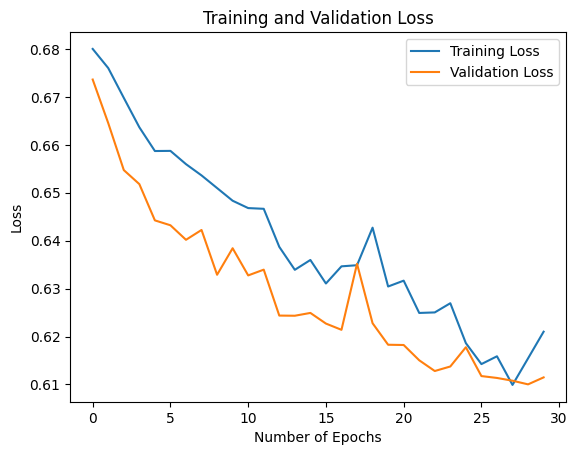

In [21]:
# plot the training loss versus the validation loss
plt.plot(history_df4['loss'], label='Training Loss')
plt.plot(history_df4['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('./Training and Validation Loss Model 4')
plt.show()

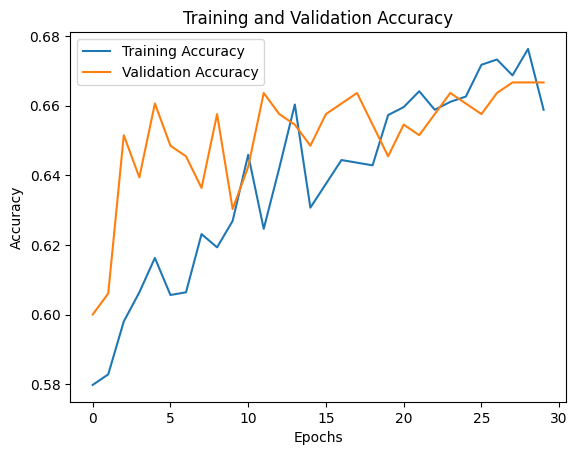

In [22]:
# plotting training and validation accuracy
plt.plot(history_df4['accuracy'], label='Training Accuracy')
plt.plot(history_df4['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('./Training and Validation Accuracy Model 4')
plt.show()

In [24]:
# predicting the binary labels for the images in the testing set
y_pred4 = (model_4.predict(x_test) > 0.5).astype(int) # compare the predicted probability to 0.5
# If the probability is greater than 0.5, the prediction will be True (class 1); otherwise, it will be False (class 0)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       198
           1       0.59      0.54      0.56       132

    accuracy                           0.67       330
   macro avg       0.65      0.65      0.65       330
weighted avg       0.66      0.67      0.66       330



<Figure size 2000x3000 with 0 Axes>

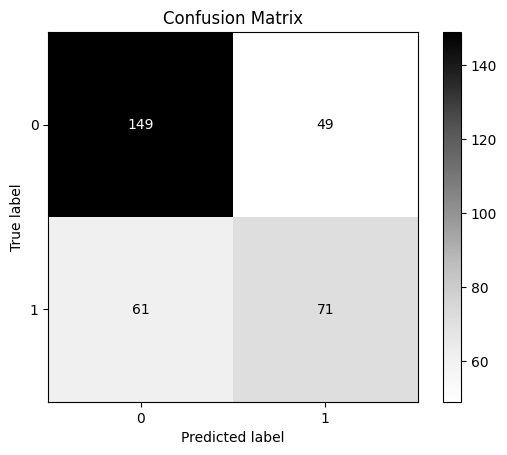

In [26]:
# evaluating model
# defining a function for classification report and confusion matrix 

def evaluate_model(y_test, y_pred4):
    """
    This function computes the classification report and plots the confusion matrix.

    Parameters:
    y_test (array-like): True labels
    y_pred (array-like): Predicted Labels
    """
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred4))

    # Confusion Matrix Plot
    plt.figure(dpi=200, figsize=(10, 15))
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred4, cmap='Greys', normalize=None
    )
    plt.title('Confusion Matrix')
    plt.show()

evaluate_model( y_test, y_pred4)

## Build a Fifth Covulotional Neural Network


## Model Five

## Constructor Stage
- In this stage, I will build 5 Convolution Blocks, with 32, 64, and 128 layers with ReLU and Pooling
- I will add a kernel size of (5,5)
- I will add padding of same
- I will use Max pooling
- I will add a flatten layer
- One Dense Layer
- I will add a dropout of 50% for regularization, to prevent overfitting.
- I will use one neuron in the output layer
- I will use the Sigmoid Activation function in the outer layer


In [27]:
#define a sequential model function that takes two arguments

def build_cnn_model(input_shape=(224, 224, 3), dropout_rate=0.5):
    """
    Builds a Convolutional Neural Network model with the specified architecture.

    Parameters:
        input_shape (tuple): Shape of the input images (height, width, channels).
        dropout_rate (float): Dropout rate for regularization.

    Returns:
        model (tf.keras.Model): The constructed CNN model.
    """
    model = Sequential()

    # Convolution Block 1
    model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolution Block 2
    model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Convolution Block 3
    model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Flatten Layer
    model.add(Flatten())

    # Fully connected Dense Layer
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    return model

# Instantiate model
model_5 = build_cnn_model()

# Model summary
model_5.summary()


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       6,422,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,681,281 (25.49 MB)

 Trainable params: 6,681,281 (25.49 MB)

 Non-trainable params: 0 (0.00 B)

## Compilation Stage
- Before training, I will configure the model with an optimizer, a loss function, and evaluation metrics:

- In this stage, I will configure the model using Adam Optimizer
- A loss function of Binary Cross Entropy since my classifaction is binary, either 0 or 1.
- My evaluation metric will be accuracy


In [28]:
# compile the model
def compile_model(model, optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']):
    """
    Compiles a given Keras model with the specified optimizer, loss function, and metrics.
    
    Parameters:
    - model: Keras model to be compiled.
    - optimizer: Optimizer to be used. In this binary classification 'adam' is used.
    - loss: Loss function to be used. Since it's a binary classification problem 'binary_crossentropy' is used.
    - metrics: List of metrics to evaluate the model. ['accuracy'] is used.
    
    Returns:
    - Compiled model.
    """
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    print(f"Model compiled with optimizer={optimizer}, loss={loss}, metrics={metrics}")
    return model


# compile the model with the compile_model function
compile_model(model_5)

Model compiled with optimizer=adam, loss=binary_crossentropy, metrics=['accuracy']


<Sequential name=sequential_1, built=True>

## Training Stage
- Train the model for 20 epochs
- Use a Batch size of 64

In [30]:
# train my model for epoch to 5. 
#finding a set of weights in the network with minimal loss

history5 = model_5.fit(
    train_datagen.flow(x_train, y_train, batch_size=128),  # Using the flow method
    epochs=20,
    validation_data=(x_test, y_test)  # Validation data
)



Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5151 - loss: 1.9806 - val_accuracy: 0.6000 - val_loss: 0.6720
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5770 - loss: 0.6796 - val_accuracy: 0.6061 - val_loss: 0.6505
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6169 - loss: 0.6591 - val_accuracy: 0.6818 - val_loss: 0.6025
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6488 - loss: 0.6295 - val_accuracy: 0.6818 - val_loss: 0.6099
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6951 - loss: 0.6104 - val_accuracy: 0.7091 - val_loss: 0.5852
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7064 - loss: 0.5987 - val_accuracy: 0.6939 - val_loss: 0.5845
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7153 - loss: 0.5855 - val_accuracy: 0.6909 - val_loss: 0.5751
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.7223 - loss: 0.5766 - val_accuracy: 0.7394 - val_loss:

In [43]:
history_df5 = pd.DataFrame(history5.history)

# print loss, accuracy
print(history_df5)

    accuracy      loss  val_accuracy  val_loss
0   0.551672  0.795800      0.600000  0.663376
1   0.583587  0.673888      0.600000  0.637550
2   0.615502  0.656721      0.660606  0.625815
3   0.648936  0.632049      0.690909  0.594038
4   0.678571  0.599857      0.718182  0.530420
5   0.696049  0.598118      0.669697  0.639012
6   0.726444  0.591129      0.754545  0.518457
7   0.725684  0.564703      0.757576  0.517305
8   0.728723  0.557972      0.781818  0.500759
9   0.743921  0.539430      0.724242  0.578725
10  0.759878  0.525288      0.775758  0.486848
11  0.759878  0.507958      0.784849  0.444677
12  0.759119  0.507629      0.727273  0.528690
13  0.766717  0.504817      0.745455  0.533719
14  0.773556  0.492483      0.769697  0.462428
15  0.756079  0.506515      0.769697  0.471858
16  0.797112  0.457169      0.803030  0.476700
17  0.793313  0.457381      0.806061  0.431099
18  0.813830  0.419803      0.796970  0.463005
19  0.801672  0.448481      0.796970  0.429275


### Using a graph to explore overfitting or underfitting

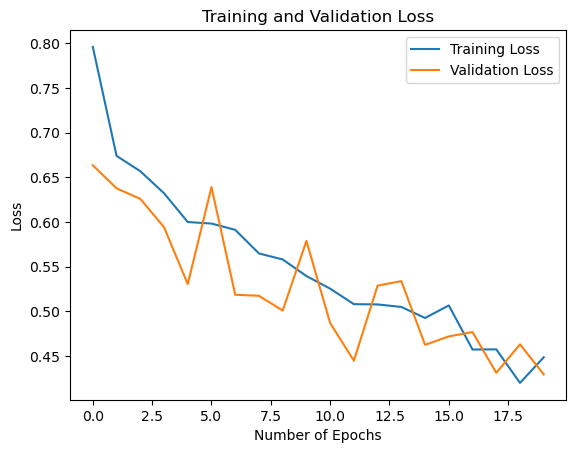

In [44]:
# plot the training loss versus the validation loss
plt.plot(history_df5['loss'], label='Training Loss')
plt.plot(history_df5['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

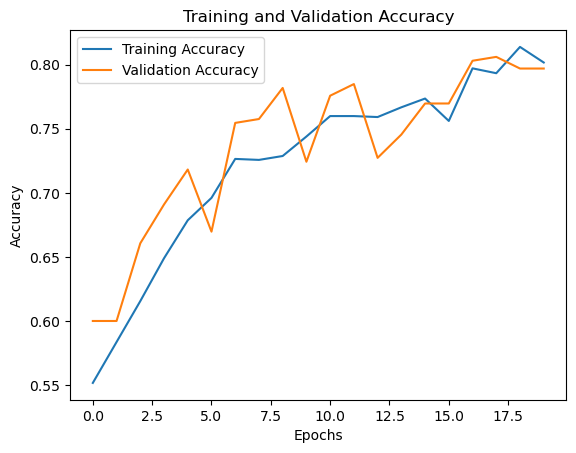

In [46]:
# plotting training and validation accuracy
plt.plot(history_df5['accuracy'], label='Training Accuracy')
plt.plot(history_df5['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluation Stage
- Predict binary labels for images in the test dataset and compare the predicted probability to 0.5
- If the probability is greater than 0.5, the prediction will be True (class 1); otherwise, it will be False (class 0).
- Generate a classification report
- Display the confusion matrix


In [50]:
# predicting the binary labels for the images in the testing set
y_pred5 = (model_5.predict(x_test) > 0.5).astype(int) # compare the predicted probability to 0.5 - threshold

11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       198
           1       0.85      0.60      0.70       132

    accuracy                           0.80       330
   macro avg       0.81      0.76      0.77       330
weighted avg       0.81      0.80      0.79       330



<Figure size 2000x3000 with 0 Axes>

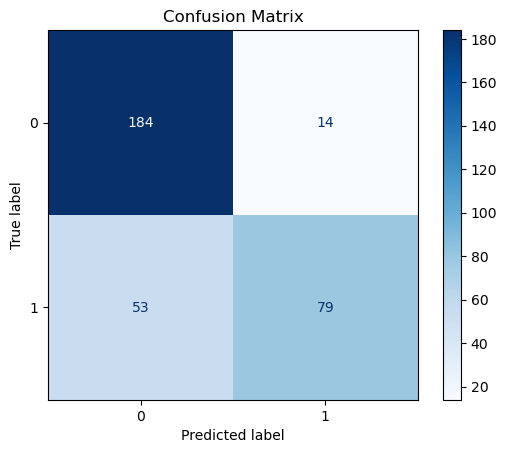

In [52]:
# defining a function for classification report and confusion matrix 
def evaluate_model(y_test, y_pred):
    """
    This function computes the classification report and plots the confusion matrix.

    Parameters:
    y_test (array-like): True labels
    y_pred (array-like): Predicted Labels
    """
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Plot
    plt.figure(dpi=200, figsize=(10, 15))
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, cmap='Blues', normalize=None
    )
    plt.title('Confusion Matrix')
    plt.show()

# use evaluation function to generate report and confusion matrix
evaluate_model( y_test, y_pred5)

## Building a Sixth Convolutional Neural Network

## Model Six

### Construction Stage

- In this stage, I will build 4 Convolution Blocks, with 32, 32, 64, and 128 layers with ReLU and Pooling
- I will add a kernel size of (3,3)
- I will use Maxpooling
- I will add a flatten layer
- One Dense Layer
- I will add a dropout of 60% for regularization, to prevent overfitting.
- I will use 1 neuron in the output layer
- I will use the Sigmoid Activation function in the outer layer

In [16]:
# Importing model sequential
model_6 = Sequential()

# First 2D Convolution Layer + Relu and Pooling
model_6.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'))
model_6.add(MaxPooling2D(pool_size=(2, 2)))

# Second 2D Convolution Layer + Relu and Pooling
model_6.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model_6.add(MaxPooling2D(pool_size=(2, 2)))

# Third 2D Convolution Layer + Relu and Pooling
model_6.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_6.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth 2D Convolution Layer + Relu and Pooling
model_6.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model_6.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a Flatten layer:
model_6.add(Flatten())

# Fully Connected Layer
model_6.add(Dense(64, activation='relu'))

# Dropout rate of 30%
model_6.add(Dropout(0.3))

# Output layer with sigmoid activation function
model_6.add(Dense(1, activation='sigmoid'))

# Print model summary
model_6.summary()


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,179,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,282,273 (4.89 MB)

 Trainable params: 1,282,273 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

## Compilation Stage
- I will compile the model with an optimizer, loss function, and metrics
- The optimizer will be Adam optimizer
- The Loss function will be binary cross entropy
- The metrics will be accuracy

In [17]:
# compile the model
model_6.compile(optimizer='Adam', 
loss='binary_crossentropy', metrics=['accuracy'])

## Training Stage
- Train the model for 20 epochs
- Introduce early stopping
- Restore the best weights
- Set patience to 10
- Set minimum amount of change to 10% or 0.01
- Use a batch size of 128

In [18]:
# training the model with early stopping
# import callbacks from tensorflow
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
min_delta= 0.01, #minimum amount of change to count as an improvement
patience=10, #how may epochs to wait before stopping
    restore_best_weights=True)



history6 = model_6.fit(
    train_datagen.flow(x_train, y_train, batch_size=128),  # Using the flow method
    epochs=20,
    callbacks=[early_stopping], # putting callbacks in a list
    validation_data=(x_test, y_test)  # Validation data
)

Epoch 1/20


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 527ms/step - accuracy: 0.5094 - loss: 0.7459 - val_accuracy: 0.6000 - val_loss: 0.6546
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 539ms/step - accuracy: 0.5829 - loss: 0.6661 - val_accuracy: 0.6758 - val_loss: 0.6261
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 540ms/step - accuracy: 0.6554 - loss: 0.6475 - val_accuracy: 0.6939 - val_loss: 0.6159
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 522ms/step - accuracy: 0.6803 - loss: 0.6296 - val_accuracy: 0.7061 - val_loss: 0.6303
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 499ms/step - accuracy: 0.6825 - loss: 0.6335 - val_accuracy: 0.7364 - val_loss: 0.5920
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 487ms/step - accuracy: 0.7013 - loss: 0.5903 - val_accuracy: 0.7455 - val_loss: 0.5863
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 491ms/step - accuracy: 0.7284 - loss: 0.5694 - val_accuracy: 0.7394 - val_loss: 0.5647
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 520ms/step - accuracy: 0.7480 - loss: 0.5658 - val_accuracy: 0.7394 - val

## Using a graph to explore overfitting or underfitting

In [19]:
history_df6 = pd.DataFrame(history6.history) # convert history to a pandas dataframe
# print loss, accuracy
print(history_df6)


    accuracy      loss  val_accuracy  val_loss
0   0.533435  0.715167      0.600000  0.654647
1   0.564590  0.666654      0.675758  0.626140
2   0.650456  0.649877      0.693939  0.615879
3   0.669453  0.637090      0.706061  0.630253
4   0.699848  0.613932      0.736364  0.592012
5   0.724164  0.570149      0.745455  0.586341
6   0.731763  0.579310      0.739394  0.564714
7   0.721125  0.574214      0.739394  0.553129
8   0.740881  0.557825      0.751515  0.543975
9   0.740122  0.538359      0.745455  0.541852
10  0.759119  0.508612      0.687879  0.738209
11  0.740881  0.559367      0.733333  0.531990
12  0.759878  0.509878      0.745455  0.519349
13  0.771277  0.491719      0.778788  0.451115
14  0.776596  0.470799      0.806061  0.437920
15  0.775076  0.474850      0.796970  0.453037
16  0.778875  0.459297      0.796970  0.438912
17  0.787234  0.452018      0.787879  0.427372
18  0.794833  0.419473      0.793939  0.453626
19  0.793313  0.460064      0.812121  0.395189


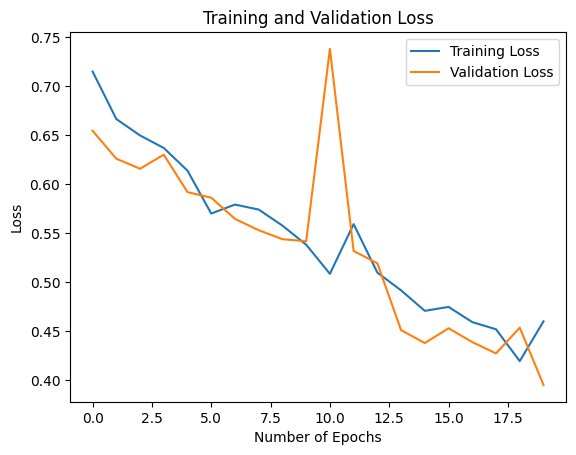

In [20]:
# plot the training loss versus the validation loss
plt.plot(history_df6['loss'], label='Training Loss')
plt.plot(history_df6['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

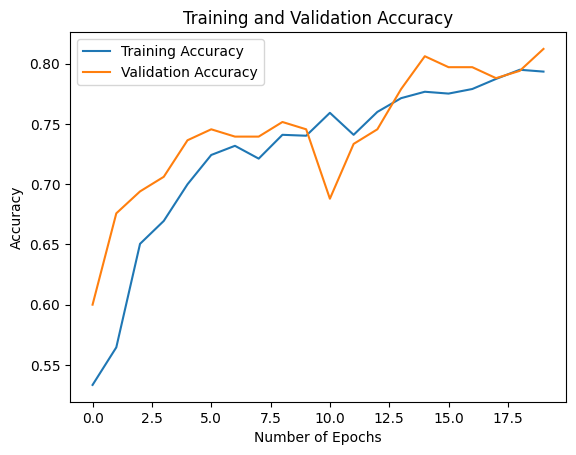

In [21]:
# plotting training and validation accuracy
plt.plot(history_df6['accuracy'], label='Training Accuracy')
plt.plot(history_df6['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluation Stage
- Predict binary labels for images in the test dataset and compare the predicted probability to 0.5
- If the probability is greater than 0.5, the prediction will be True (class 1); otherwise, it will be False (class 0).
- Generate a classification report
- Display the confusion matrix


In [22]:
# predicting the binary labels for the images in the testing set
y_pred6 = (model_6.predict(x_test) > 0.5).astype(int) # compare the predicted probability to 0.5 - threshold

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       198
           1       0.86      0.64      0.73       132

    accuracy                           0.81       330
   macro avg       0.83      0.78      0.79       330
weighted avg       0.82      0.81      0.81       330



<Figure size 2000x3000 with 0 Axes>

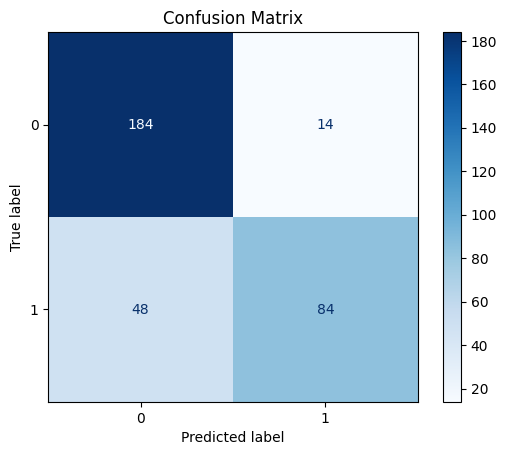

In [24]:
# defining a function for classification report and confusion matrix 
def evaluate_model(y_test, y_pred):
    """
    This function computes the classification report and plots the confusion matrix.

    Parameters:
    y_test (array-like): True labels
    y_pred (array-like): Predicted Labels
    """
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred6))

    # Confusion Matrix Plot
    plt.figure(dpi=200, figsize=(10, 15))
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred6, cmap='Blues', normalize=None
    )
    plt.title('Confusion Matrix')
    plt.show()

# use evaluation function to generate report and confusion matrix
evaluate_model( y_test, y_pred6)

## Building a Seventh Convolutional Neural Network

## Model 7

## Construction Stage
- In this stage, I will build 4 Convolution Blocks, with 16, 32, 64, and 128 layers with ReLU and Pooling
- I will add a kernel size of (3,3)
- I will use a stride of (2,2)
- I will use Max pooling
- I will add a flatten layer
- One Dense Layer
- I will add a dropout of 40% for regularization, to prevent overfitting.
- I will use one neuron in the output layer
- I will use the Sigmoid Activation function in the outer layer

In [26]:
# using sequential to build my convolution blocks and pooling, flatten, and fully connected layers. 

# Define the model
model_7 = Sequential([
    # First Convolutional Layer
    Conv2D(filters=32, kernel_size=(5, 5), strides=(2, 2), activation='relu', input_shape=(224, 224, 3)),
    # First MaxPooling Layer
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    
    # Second Convolutional Layer with Pooling and Relu
    Conv2D(filters=64, kernel_size=(5, 5), strides=(2, 2), activation='relu'),
    # Second MaxPooling Layer
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    
    # Third Convolutional Layer with Pooling and Relu
    Conv2D(filters=128, kernel_size=(5, 5), strides=(2, 2), activation='relu'),
    # Third MaxPooling Layer
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    
    # Flatten ayer
    Flatten(),
    
    # Fully connected layers
    Dense(64, activation='relu'), # this is the hidden layer
    Dropout(0.4),  # Regularization to prevent overfitting
    
   Dense(1, activation = 'sigmoid')  # this is the outer layer with sigmoid activation function
])


# Summary of the model
model_7.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 110, 110, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 5, 5, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 291,521 (1.11 MB)

 Trainable params: 291,521 (1.11 MB)

 Non-trainable params: 0 (0.00 B)

## Compilation Stage
- SGD Optimizer with learning rate of 0.01
- loss will be binary cross entropy
- metrics will be accuracy

In [27]:
# define a function to compile the model

def compile_cnn_model(model, learning_rate=0.01, momentum=0.8):
    """
    Compiles a CNN model with the specified optimizer, loss function, and metrics.

    Parameters:
        model (tf.keras.Model): The model to compile.
        learning_rate (float): Learning rate for the SGD optimizer.
        momentum (float): Momentum for the SGD optimizer.

    Returns:
        None
    """
    # Define SGD optimizer with momentum
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    
    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

# compile model using defined function
compile_cnn_model(model_7)


## Training Stage
- I will train the model for 20 epochs
- I will use a batch size of 32

In [28]:
# train my model for epoch to 5. 
#finding a set of weights in the network with minimal loss

history7 = model_7.fit(
    train_datagen.flow(x_train, y_train, batch_size=32),  # Using the flow method
    epochs=20,
    validation_data=(x_test, y_test)  # Validation data
)



Epoch 1/20


C:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - accuracy: 0.5753 - loss: 0.6827 - val_accuracy: 0.6000 - val_loss: 0.6674
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.6007 - loss: 0.6691 - val_accuracy: 0.6364 - val_loss: 0.6715
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.6027 - loss: 0.6658 - val_accuracy: 0.6000 - val_loss: 0.6530
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.5971 - loss: 0.6720 - val_accuracy: 0.6727 - val_loss: 0.6416
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.6433 - loss: 0.6547 - val_accuracy: 0.6727 - val_loss: 0.6316
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.6650 - loss: 0.6339 - val_accuracy: 0.6697 - val_loss: 0.6137
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.6904 - loss: 0.6178 - val_accuracy: 0.6848 - val_loss: 0.6135
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.6775 - loss: 0.6112 - val_accuracy: 0.6939 - val_

In [29]:
history_df7 = pd.DataFrame(history7.history) # convert history to pandas dataframe
#print accuracy and loss
print(history_df7)

    accuracy      loss  val_accuracy  val_loss
0   0.585866  0.681436      0.600000  0.667434
1   0.589666  0.676037      0.636364  0.671494
2   0.598784  0.668899      0.600000  0.653000
3   0.609423  0.666527      0.672727  0.641558
4   0.625380  0.659590      0.672727  0.631558
5   0.660334  0.634390      0.669697  0.613732
6   0.669453  0.633340      0.684848  0.613506
7   0.683891  0.609146      0.693939  0.600717
8   0.702128  0.603276      0.715151  0.590839
9   0.709726  0.580887      0.715151  0.582919
10  0.711246  0.581637      0.718182  0.580859
11  0.714286  0.580258      0.736364  0.568856
12  0.731763  0.570189      0.730303  0.567651
13  0.737082  0.554458      0.751515  0.565383
14  0.740122  0.560861      0.745455  0.544917
15  0.725684  0.553368      0.760606  0.541932
16  0.727964  0.557441      0.730303  0.543515
17  0.722644  0.561380      0.760606  0.514871
18  0.748480  0.520693      0.751515  0.505361
19  0.732523  0.529573      0.748485  0.510437


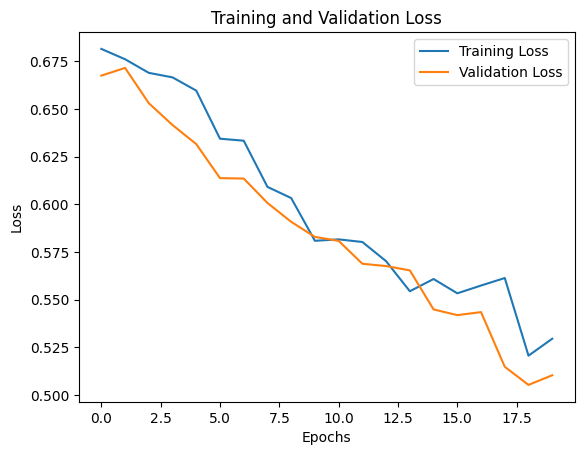

In [32]:
# plot the training loss versus the validation loss
plt.plot(history_df7['loss'], label='Training Loss')
plt.plot(history_df7['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

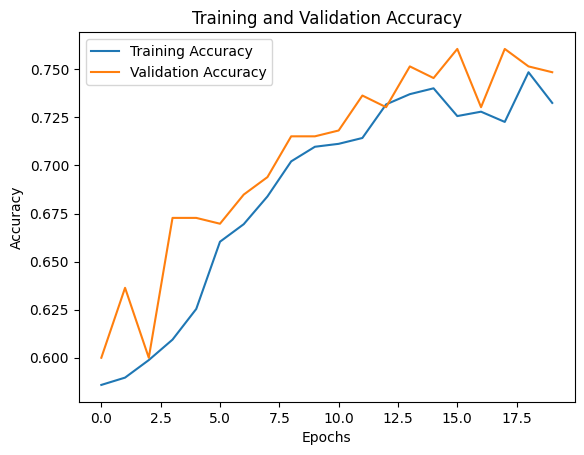

In [33]:
# plotting training and validation accuracy
plt.plot(history_df7['accuracy'], label='Training Accuracy')
plt.plot(history_df7['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluation Stage
- Convert the predictions to binary (0 or 1)
- Generate a classification report
- Display the confusion matrix

In [35]:
# predicting the binary labels for the images in the testing set
y_pred7 = (model_7.predict(x_test) > 0.5).astype(int) # compare the predicted probability to 0.5 - threshold

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       198
           1       0.86      0.64      0.73       132

    accuracy                           0.81       330
   macro avg       0.83      0.78      0.79       330
weighted avg       0.82      0.81      0.81       330



<Figure size 2000x3000 with 0 Axes>

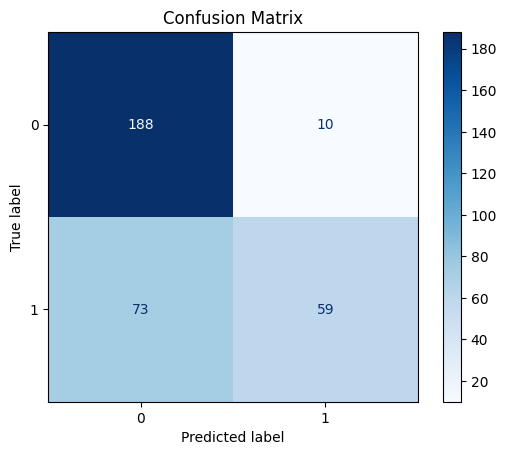

In [37]:
# defining a function for classification report and confusion matrix 
def evaluate_model(y_test, y_pred):
    """
    This function computes the classification report and plots the confusion matrix.

    Parameters:
    y_test (array-like): True labels
    y_pred (array-like): Predicted Labels
    """
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred6))

    # Confusion Matrix Plot
    plt.figure(dpi=200, figsize=(10, 15))
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred7, cmap='Blues', normalize=None
    )
    plt.title('Confusion Matrix')
    plt.show()

# use evaluation function to generate report and confusion matrix
evaluate_model( y_test, y_pred7)

## References
- OpenAI (2024). ChatGPT. Version 4.0. Available at: https://chat.openai.com/ [Accessed 19 November 2024].
- Ayodeji Oyinbo (2024). Emergency Vehicle Identification. https://www.kaggle.com/code/ayodejioyinbo/emergency-vehicle-identification. [Accessed 25 November 2024]
- Harshini Aiyyer (2021). CNN+Data Augmentation+Early Stopping+ Regularization https://www.kaggle.com/code/harshiniaiyyer/cnn-data-augmentation-earlystopping-regularization.  [Accessed 29 November 2024]